In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\international-airline-passengers .csv")
df

,Month,Passangers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.info

<bound method DataFrame.info of        Month  Passangers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]>

In [4]:
df.shape

(144, 2)

In [5]:
df.head()

,Month,Passangers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.tail()

,Month,Passangers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
df.columns=['Month','Passenger']

In [8]:
df.set_index('Month', inplace=True)

In [9]:
split_point = int(len(df)*0.8)
train_data, test_data = df.iloc[:split_point], df.iloc[split_point:]

In [11]:
ar_model= AutoReg(train_data['Passenger'], lags=5) #adjust the lag order as needed
ar_results= ar_model.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
y_prod= ar_results.predict(start=len(train_data), end=len(train_data)+ len(test_data) -1, dynamic=False)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [13]:
#calc MAE AND RMSE
mae= mean_absolute_error(test_data['Passenger'],y_prod)
rmse= np.sqrt(mean_squared_error(test_data['Passenger'],y_prod))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'RMSE:{rmse:.2f}')

Mean Absolute Error: 66.05
RMSE:77.73


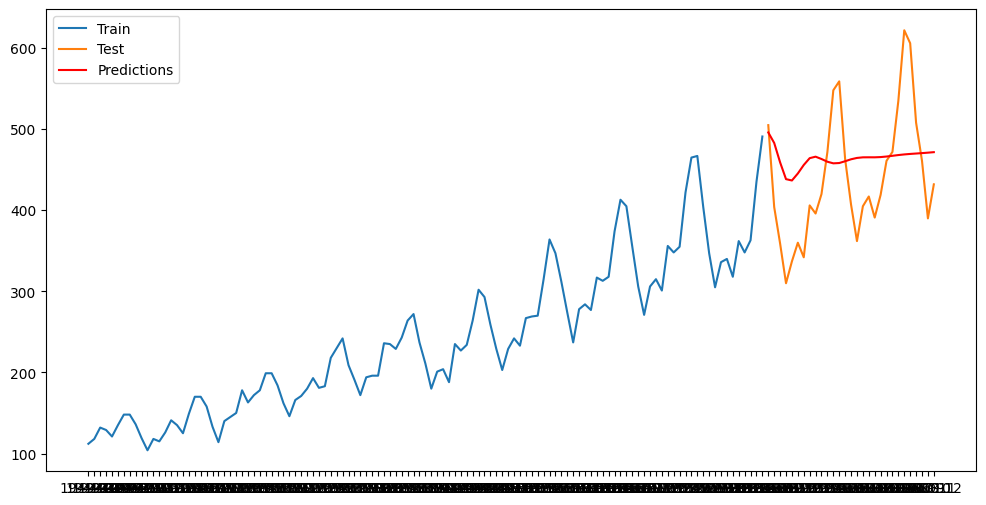

In [14]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Passenger'], label = 'Train')
plt.plot(test_data['Passenger'], label = 'Test')
plt.plot(test_data.index,y_prod,label='Predictions', color ='red')
plt.legend()

